# Unsupervise learning using k-means Clustering

## Overview

### Definition
K-means clustering is a popular unsupervised learning algorithm used for clustering data points into groups or clusters based on their similarity. It is widely used in various fields such as image segmentation, document clustering, and customer segmentation. The k-means algorithm aims to minimize the sum of squared distances between the data points and their nearest cluster center, also known as centroids.  

### Objectives
1. To implement k-means clustering in Python using the SciPy library.
2. To evaluate the performance of our algorithm.
3. To determine an optimal value for k.

## Step1: Creating and vizualising a Mock Database

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(69)

In [3]:
X = np.random.randn(50, 2)

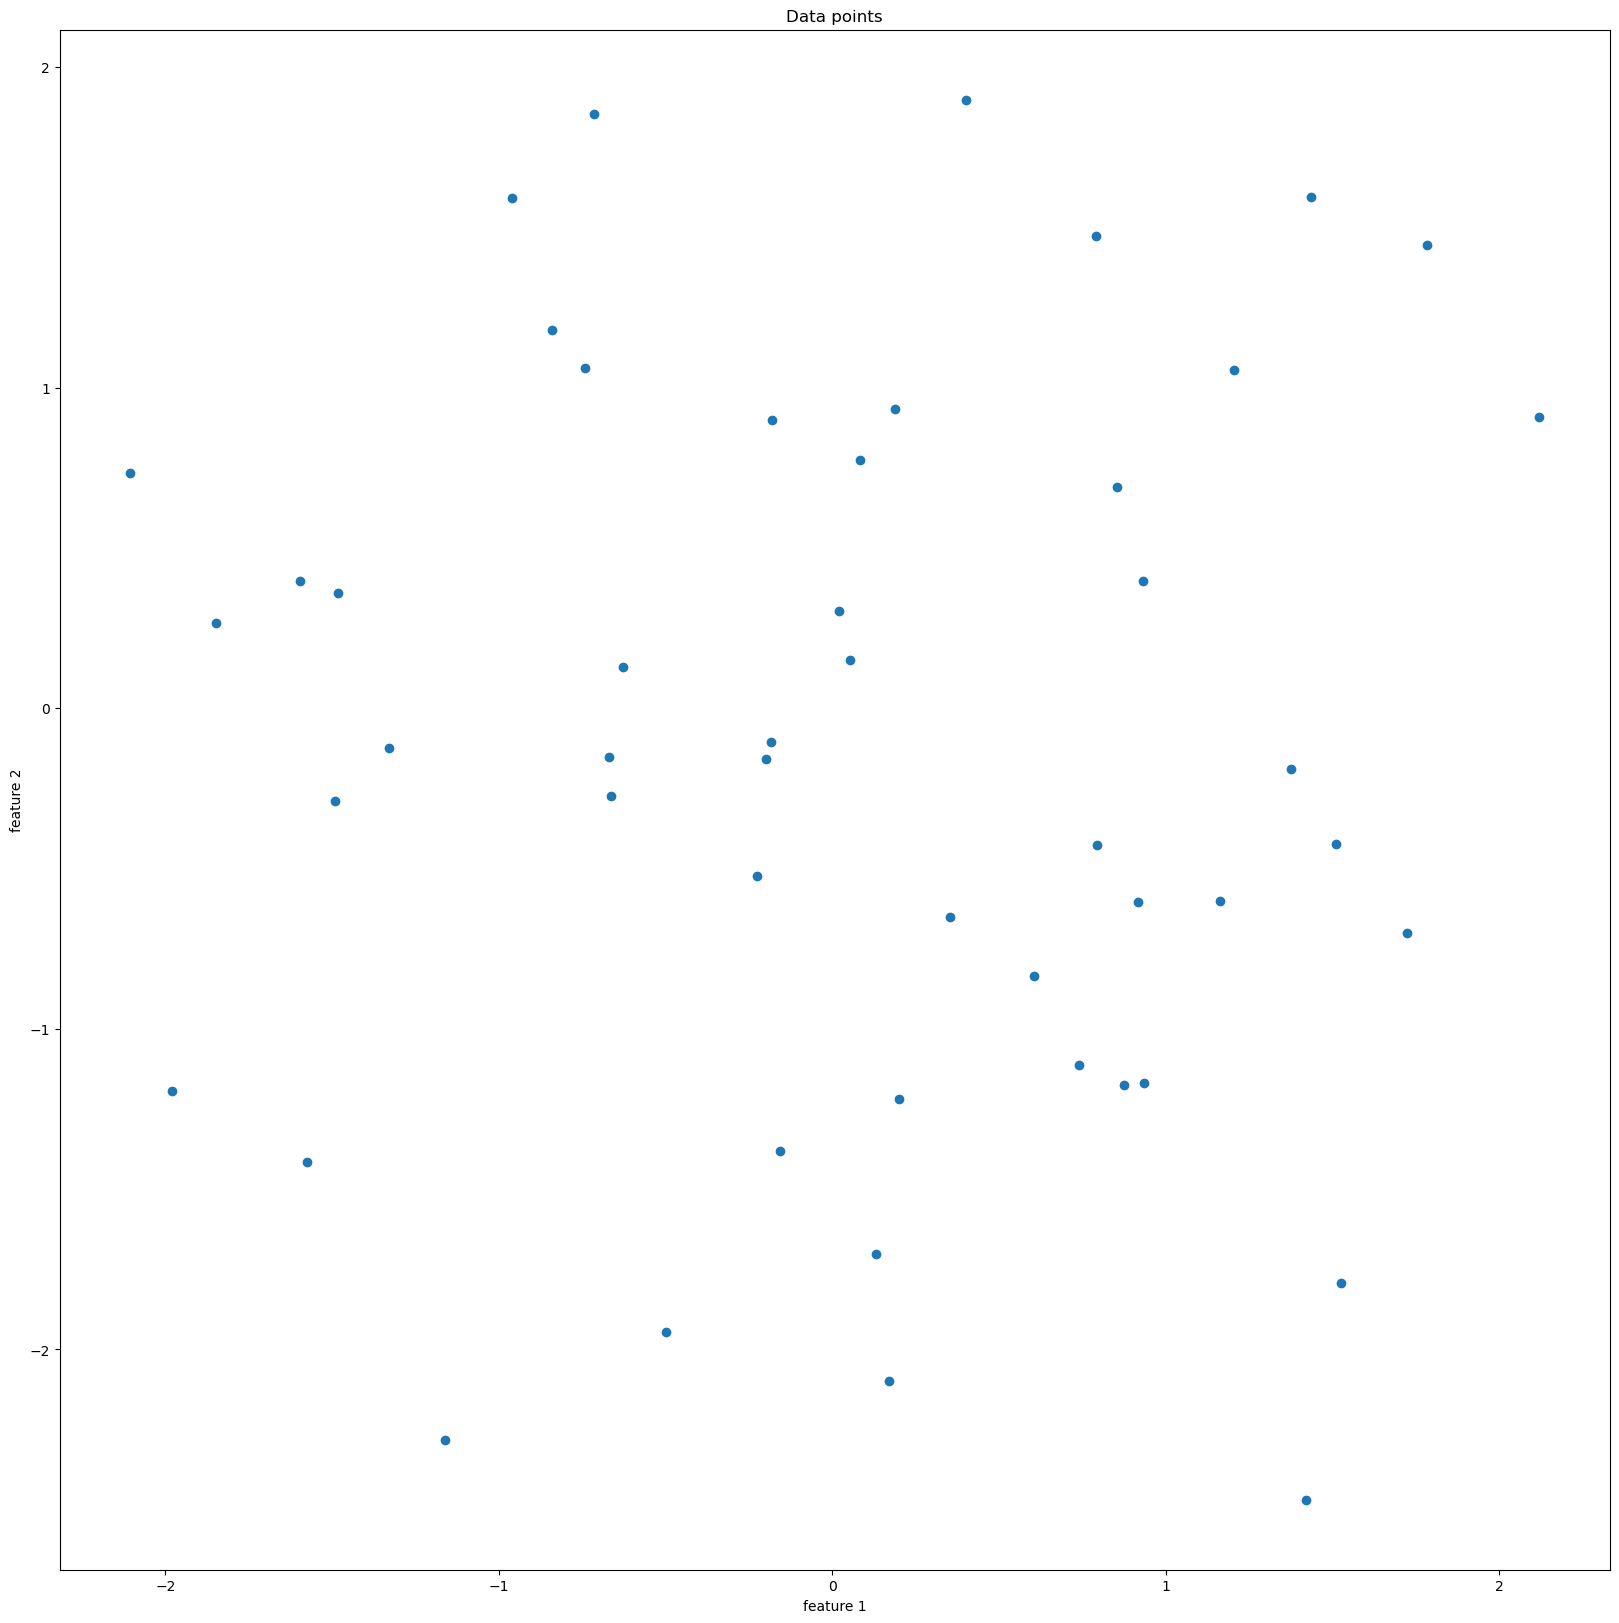

In [4]:
def plot_data(X):
    plt.figure(figsize=(20, 20))
    plt.title('Data points')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

def plot_data_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
    plt.show()


plot_data(X)

## Step 2: Implementing k-means Clustering in Python with SciPy

In [5]:
from scipy.cluster.vq import kmeans, vq

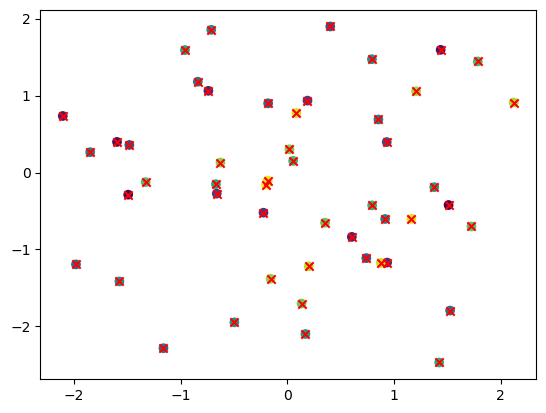

In [6]:
cluster_count = 50

# Perform clustering
centroids, _discard = kmeans(X, cluster_count)
# Assign each point to a cluser
labels, _discard = vq(X, centroids)

plot_data_clusters(X, labels, centroids)

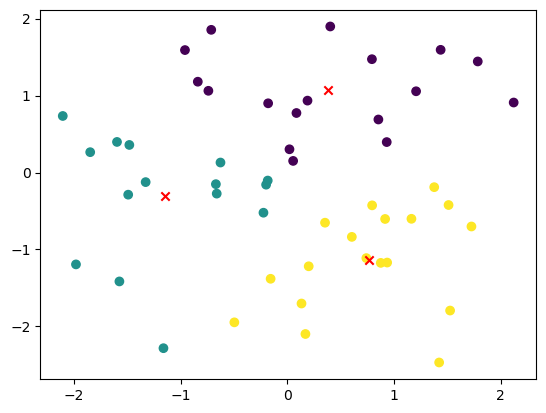

In [7]:
cluster_count = 3

# Perform clustering
centroids, _discard = kmeans(X, cluster_count)
# Assign each point to a cluser
labels, _discard = vq(X, centroids)

plot_data_clusters(X, labels, centroids)

## Step 3: Varying the Number of Clusters

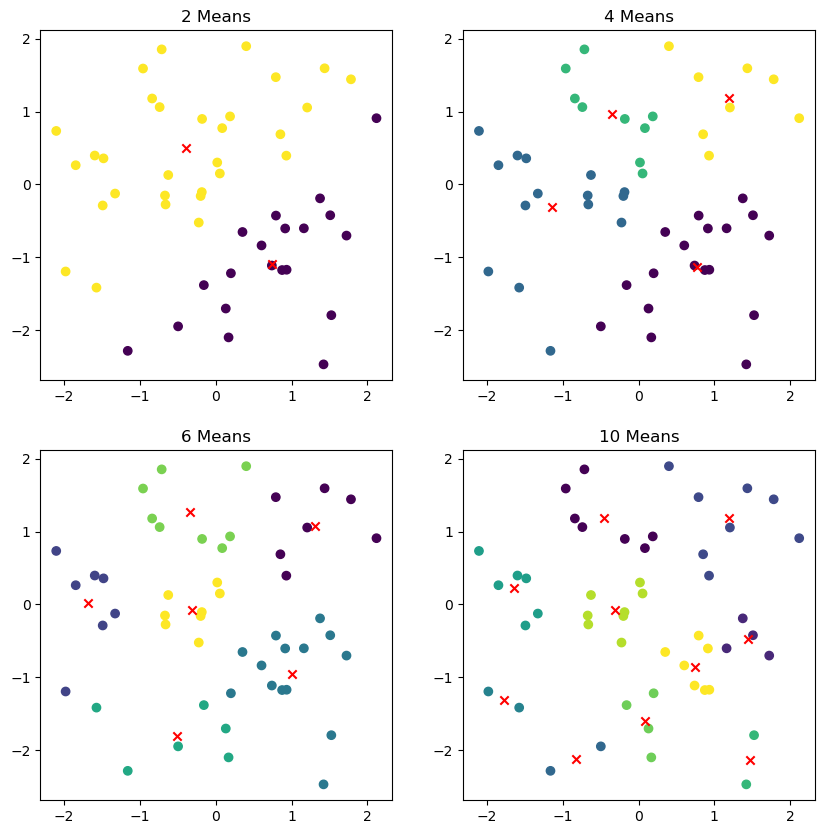

In [8]:
plt.figure(figsize=(10, 10))
for i, cluster_count in enumerate([2, 4, 6, 10]):
    centroids, _discard = kmeans(X, cluster_count)
    labels, _discard = vq(X, centroids)
    plt.subplot(2, 2, i + 1)
    plt.title(f'{ cluster_count } Means')
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
plt.show()

## Step 4: Evaluating the Clustering Results


### Silhouette score
 => how far apart the data points in a cluster are compared to how far apart the data points in other clusters are. Both cohesion and separation are taken into account.  


     - A score of -1 means that the data point is far away from other points in its own cluster and close to points in neighboring clusters.

     - A score of 1 means that the data point is close to other points in its own cluster and far away from points in neighboring clusters.

    - A number of 0 means that the data point is right on the edge of two groups

### Calinski Harabasz Index (variance ratio criterion)
 => a measure of how well-separated clusters are in a clustering solution. It measures the ratio of the between-cluster variance to the within-cluster variance, and a higher Calinski-Harabasz index indicates better clustering performance. It is defined as follows:  

    CHI = (B / (k - 1)) / (W / (n - k)) 
        where B is the between-cluster variance (sum of squared distances between cluster centroids and the global centroid)
              W is the within-cluster variance (sum of squared distances from each point to the centroid)

In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [10]:
last_silhouette_score = silhouette_score(X, labels)
print(f'Silhouette score: {last_silhouette_score:.2f}')

Silhouette score: 0.43


In [11]:
last_chi = calinski_harabasz_score(X, labels)
print(f'CHIndex: {last_chi:.2f}')

CHIndex: 46.04


## Step 4: Determine the optimum number of clusters using the elbow method

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

In [13]:
np.random.seed(69)
X = np.random.rand(100,2)

In [14]:
# Within-cluster-sum-of-squares
wcss = [distortion for centroids, distortion in \
        [kmeans(X, cluster_count) for cluster_count in range(1, 101)]]

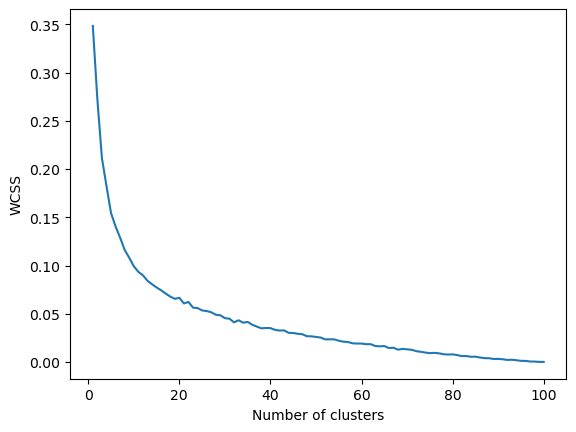

In [15]:
plt.plot(range(1, 101), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The name of 'Elbow method' refers to the shape of the graph as we look to see where wcss starts to level off  
From the graph above, a good number of clusters seems to be around 25 or 30, when wcss is around 0.05

## K-means using numpy and scipy

In [16]:
import numpy as np
from scipy.spatial.distance import cdist

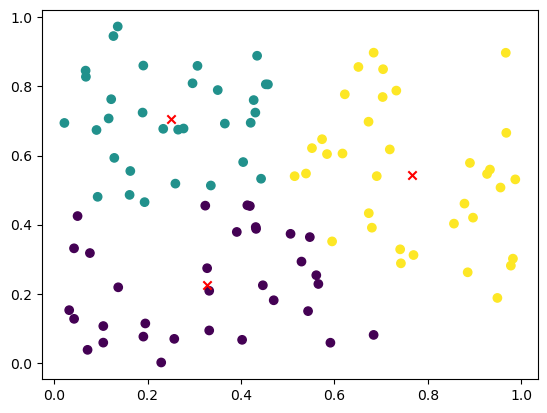

In [17]:
def kmeans_basic(X, k, max_iter=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for i in range(max_iter):
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)
        
    return labels, centroids

labels, centroids = kmeans_basic(X, k=3)

plot_data_clusters(X, labels, centroids)

## Computing the similarity between clusters using the mean distance between elements

In [18]:
from scipy.spatial.distance import cdist

In [19]:
def mean_distance_similarity(X, labels):
    distances = cdist(X, X)
    similarity = 0
    for i in np.unique(labels):
        cluster_distances = distances[labels == i, :][:, labels == i]
        similarity += np.mean(cluster_distances)
        
    similarity /= len(np.unique(labels))
    
    return similarity

In [20]:
mds = mean_distance_similarity(X, labels)
print(f'Mean distance similarity: {mds:.2f}')

Mean distance similarity: 0.28


#### Modify the mock database to have 100 samples and 3 features. Perform k-means clustering with k=4 and visualize the results using different marker styles for each cluster.

In [21]:
np.random.seed(69)
dataset = np.random.randn(100, 3)
cluster_count = 4

In [22]:
centroids, distortion = kmeans(dataset, cluster_count)
labels, distortions = vq(dataset, centroids)

In [23]:
views = [(-30, 10), (0, 15), (30, 60), (60, 90)] 
colors = ['m', 'c', 'y', 'g']
markers = ['s', 'P', '*', 'o']

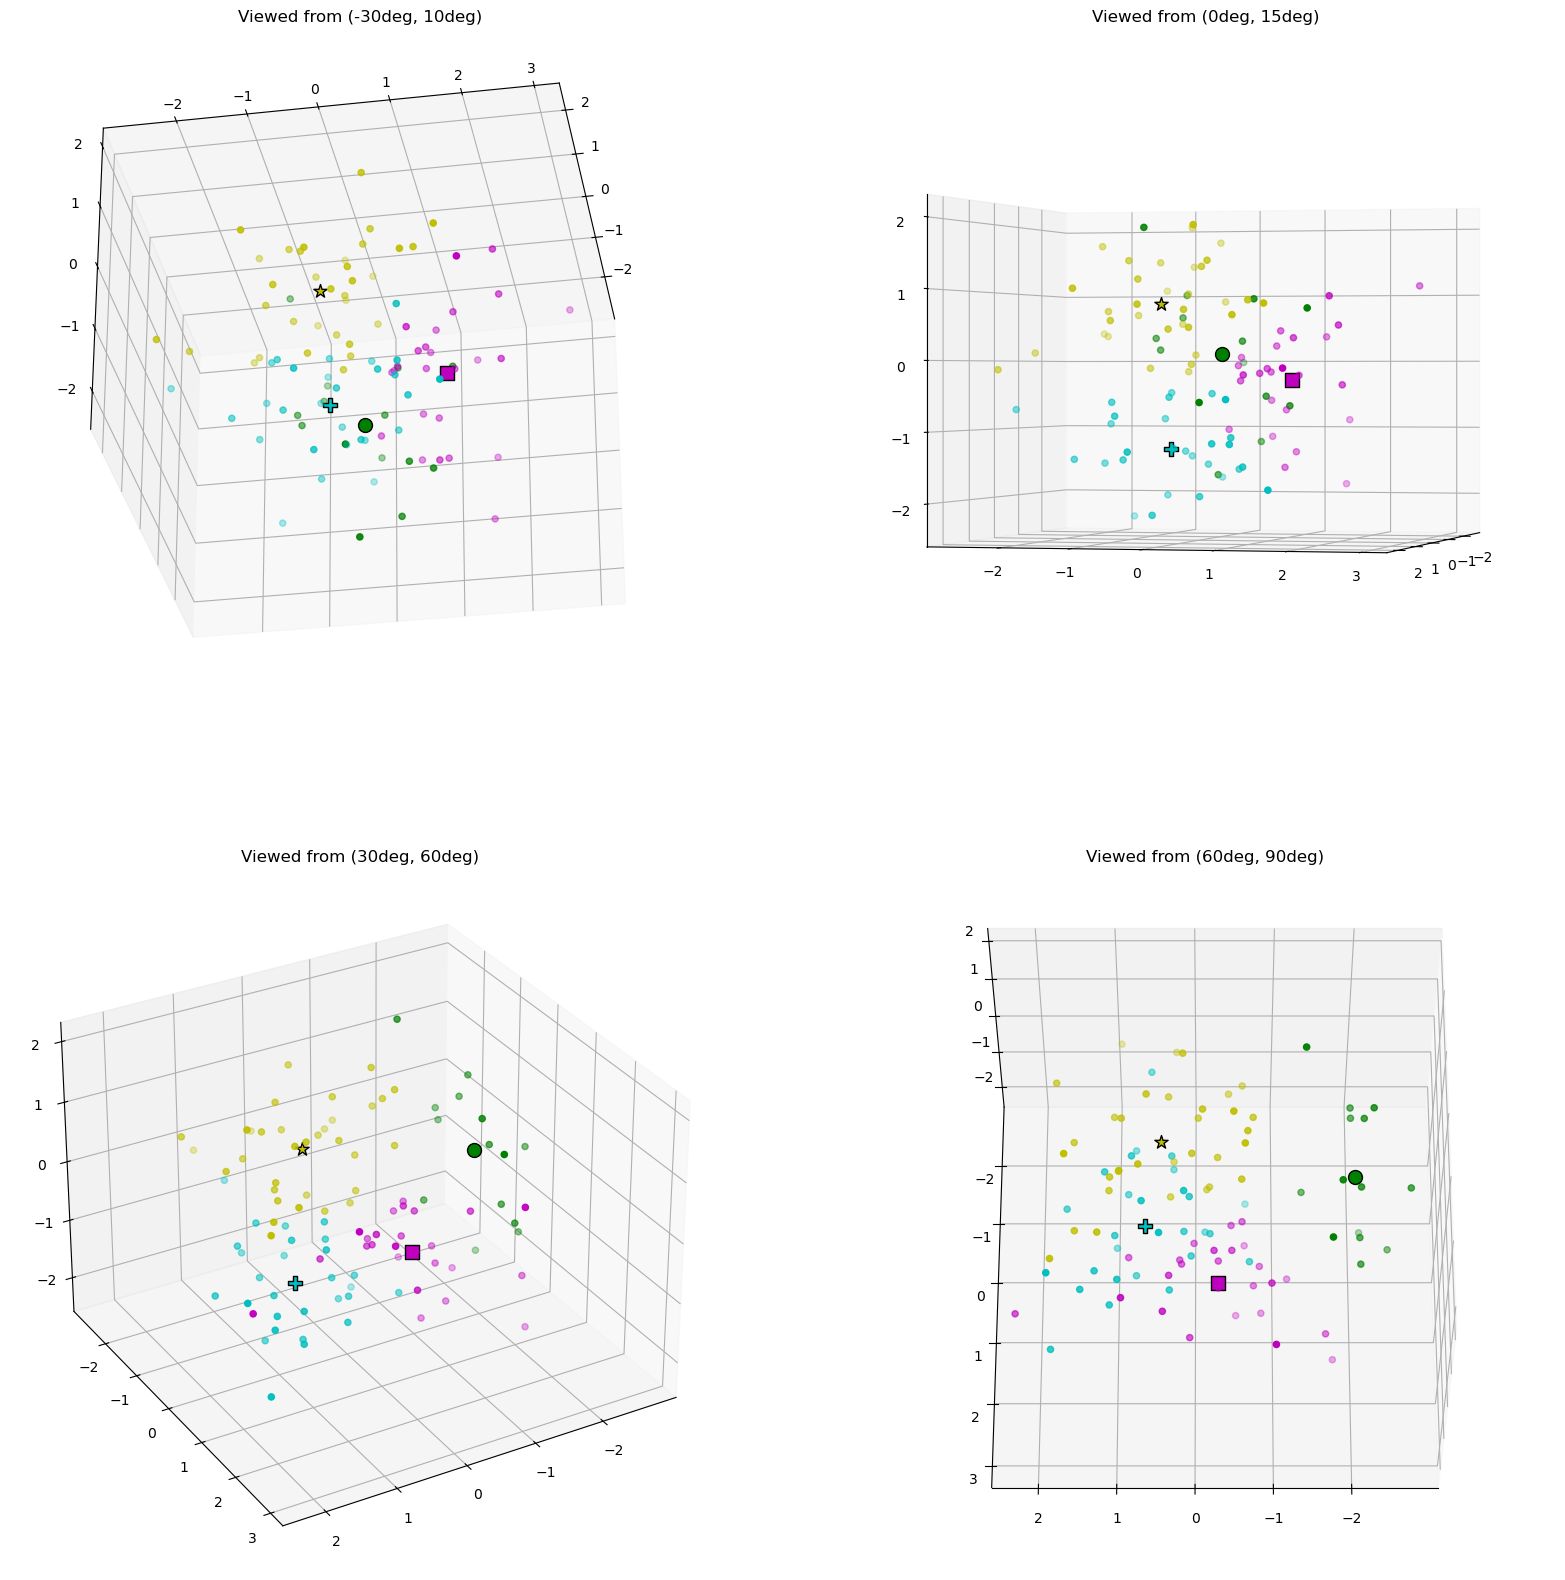

In [24]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(20, 20))
axes = axes.flatten()
for index, axis in enumerate(axes):
    perspective = views[index]
    for jndex in range(cluster_count):
        points = dataset[labels == jndex]
        axis.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors[jndex])
        axis.scatter(centroids[jndex, 0], centroids[jndex, 1], centroids[jndex, 2],\
                   s=100, c=colors[jndex], marker=markers[jndex], edgecolor='k')
    axis.view_init(perspective[0], perspective[1])
    axis.set_title(f'Viewed from ({perspective[0]}deg, {perspective[1]}deg)')
plt.show()

#### Implement a new similarity measure based on Manhattan (cityblock) distance for k-means clustering and compare the clustering performance using Silhouette score and Calinski-Harabasz index with the Euclidean distance measure.

In [25]:
dataset = np.random.randn(1_000, 2)

In [26]:
def kmeans_basic(X, k, max_iter=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for _ in range(max_iter):
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)
        
    return labels, centroids

def kmeans_manhattan(X, k, max_iter=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for _ in range(max_iter):
        distances = cdist(X, centroids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        for j in range(k):
            centroids[j] = np.mean(X[labels == j, :], axis=0)

    return labels, centroids

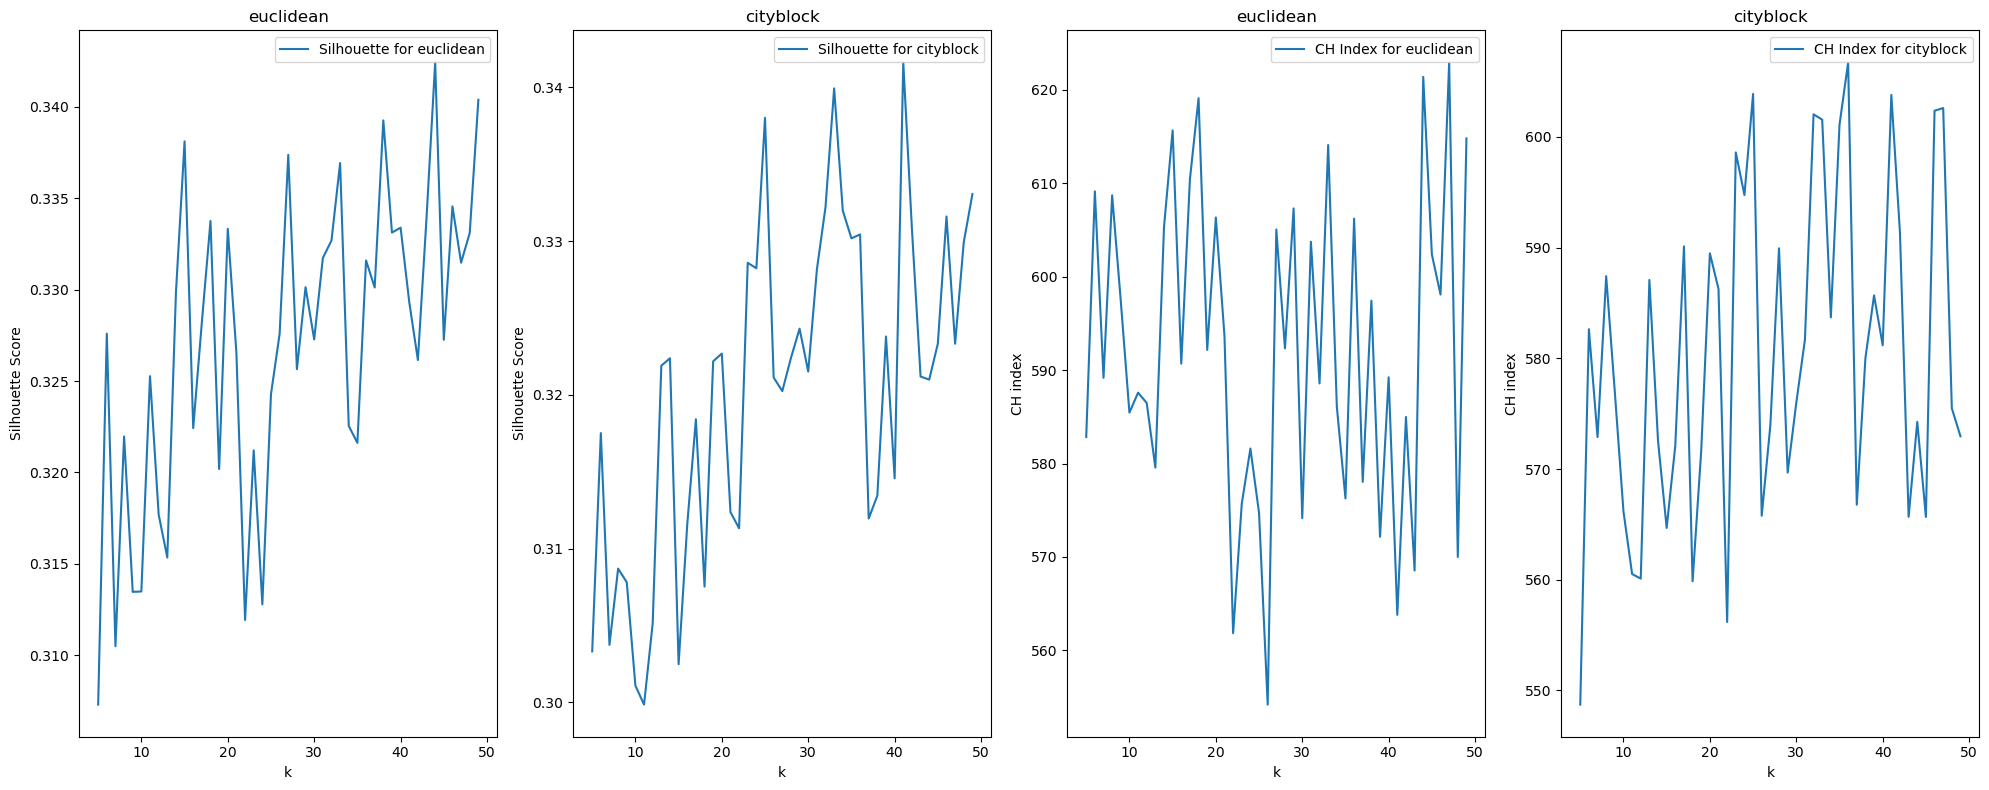

In [27]:
krange = range(5, 50)

plt.figure(figsize=(20, 8))
for index, name, method in [(1, 'euclidean', kmeans_basic), (2, 'cityblock', kmeans_manhattan)]:
    sscores = []
    chindexes = []
    for k in krange:
        labels, centroids = method(dataset, k)
        try:
            silhouette = silhouette_score(dataset, labels, metric=name)
            chindex = calinski_harabasz_score(dataset, labels)
        except ValueError as ve:
            print(ve)
            print(labels)
        sscores.append(silhouette)
        chindexes.append(chindex)
        
    plt.subplot(1,4,index)
    plt.plot(krange, sscores, label = f'Silhouette for {name}')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title(f'{name}')
    plt.legend()

    plt.subplot(1,4, index + 2)
    plt.plot(krange, chindexes, label = f'CH Index for {name}')
    plt.xlabel('k')
    plt.ylabel('CH index')
    plt.title(f'{name}')
    plt.legend()

plt.tight_layout()
plt.show()

#### Generate a new mock database with 5 clusters and 2 features. Perform k-means clustering with different values of k (2, 3, 4, 5, 6) and compare the clustering performance using the elbow method

In [28]:
from sklearn.datasets import make_blobs

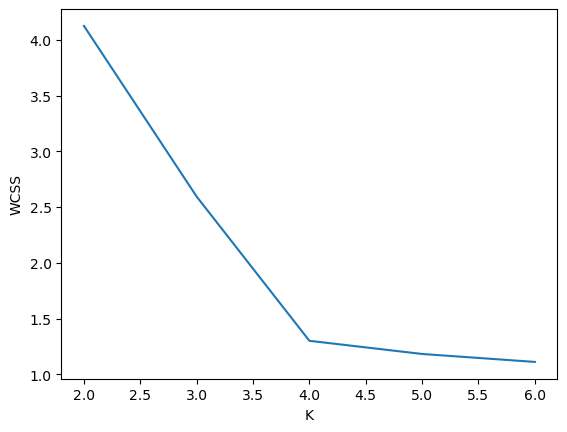

In [29]:
krange = range(2,7)
dataset, cluster = make_blobs(n_samples=1_000, centers=5, n_features=2, random_state=69)
wcss = [distortion for centroids, distortion in \
        [kmeans(dataset, cluster_count) for cluster_count in krange]]

plt.plot(krange, wcss)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

#### Use the iris dataset from Scikit-learn and perform k-means clustering with k=3. Visualize the results using a scatter plot with different marker styles for each cluster. Evaluate the clustering performance using Silhouette score and Calinski-Harabasz index.

In [30]:
from sklearn.datasets import load_iris

In [31]:
dataset = load_iris()
X = dataset.data
y = dataset.target
k = 3

In [32]:
centroids, _discard = kmeans(X, k)
labels, _discard = vq(X, centroids)

In [33]:
def plot3d(data, labels, centroids):
    views = [(-30, 10), (0, 15), (30, 60), (60, 90)] 
    colors = ['m', 'c', 'y']
    markers = ['s', 'P', 'o']
    fig, axes = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(10, 10))
    axes = axes.flatten()
    for index, axis in enumerate(axes):
        perspective = views[index]
        for jndex in range(k):
            points = data[labels == jndex]
            axis.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors[jndex])
            axis.scatter(centroids[jndex, 0], centroids[jndex, 1], centroids[jndex, 2],\
                       s=100, c=colors[jndex], marker=markers[jndex], edgecolor='k')
        axis.view_init(perspective[0], perspective[1])
        axis.set_title(f'Viewed from ({perspective[0]}deg, {perspective[1]}deg)')
    plt.show()

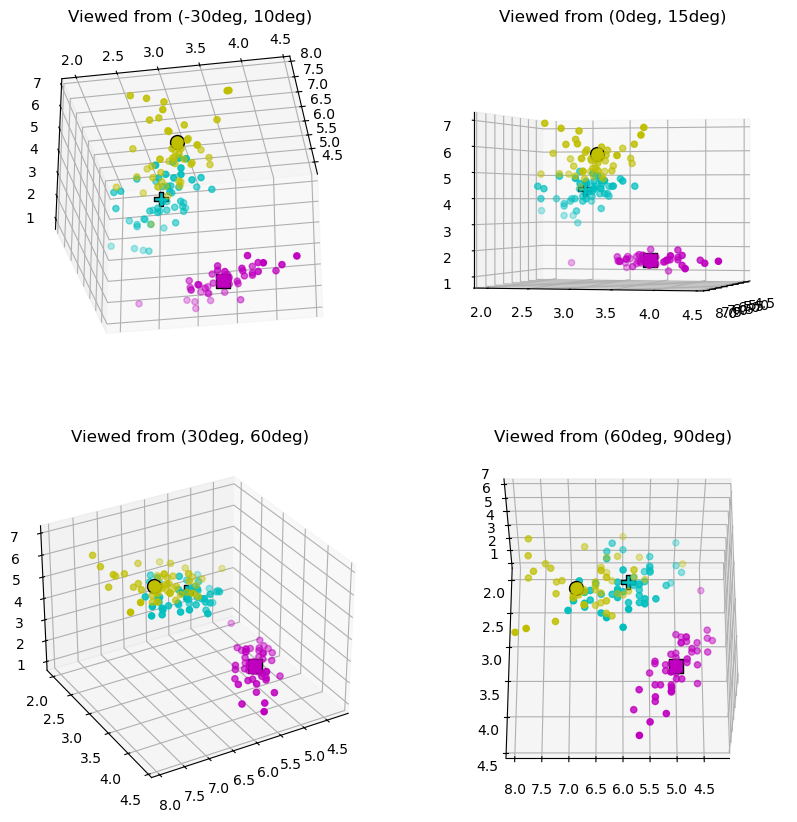

In [34]:
plot3d(X, y, centroids)

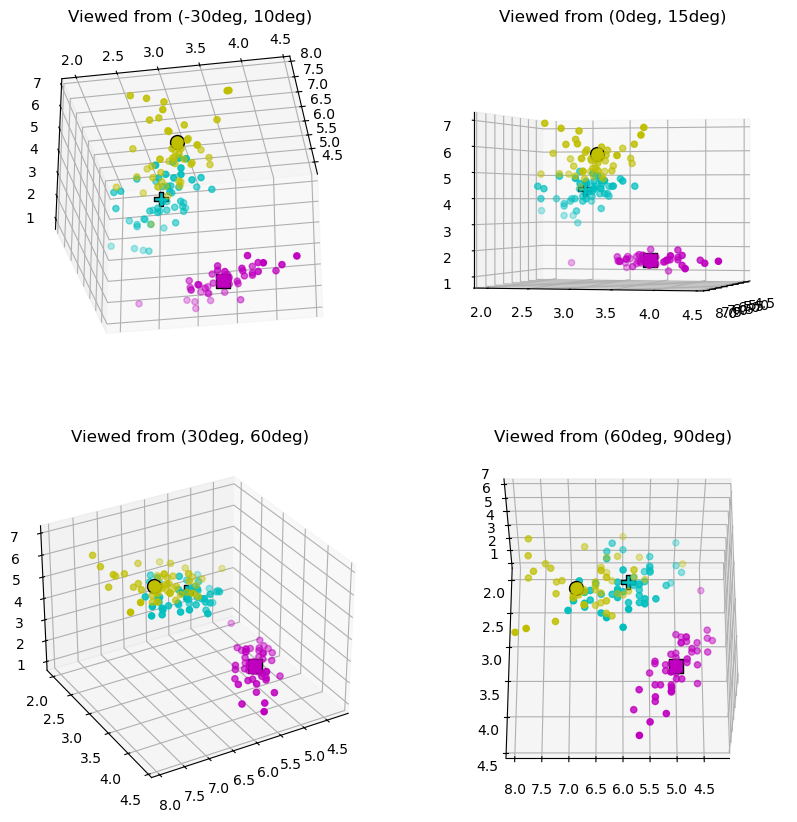

In [35]:
X_trunc = X[:, :3]
centroids_trunc = centroids[:, :3]
plot3d(X_trunc, y, centroids_trunc)

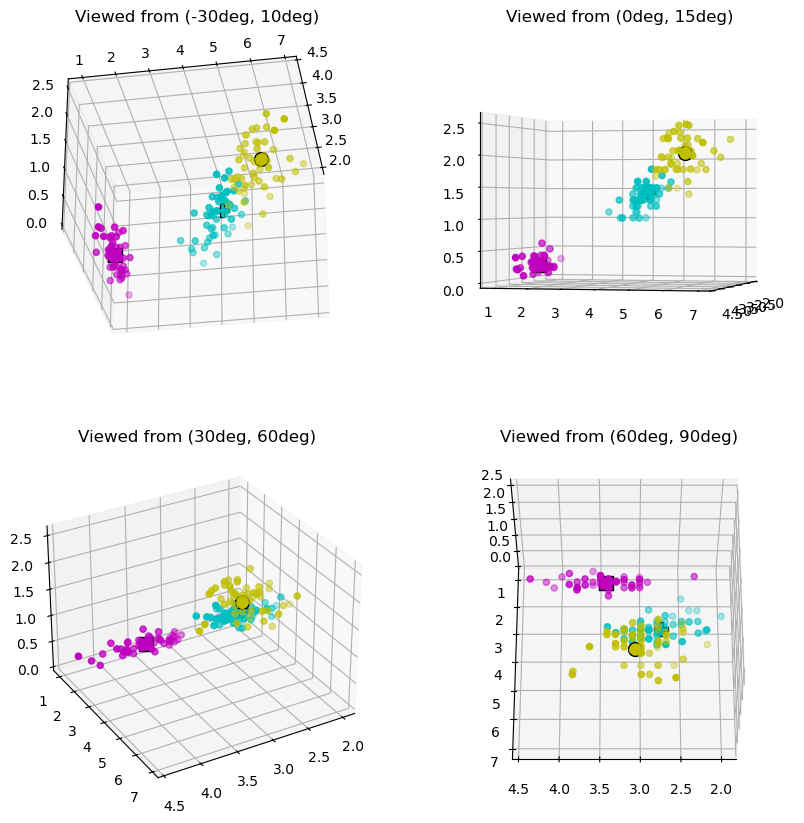

In [36]:
X_trunc = X[:, 1:]
centroids_trunc = centroids[:, 1:]
plot3d(X_trunc, y, centroids_trunc)

In [37]:
silhouette = silhouette_score(X, labels)
chindex = calinski_harabasz_score(X, labels)
print(f'Silhouette score: {silhouette:.2f}')
print(f'Calinski-Harabasz index: {chindex:.2f}')

Silhouette score: 0.55
Calinski-Harabasz index: 561.63
